In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score, classification_report, confusion_matrix, accuracy_score
from nextbike.io import *
import sys
import matplotlib.pyplot as plt

sys.path.insert(0,"..")

In [31]:
bremen_test = pd.read_csv(os.path.join(get_data_path(), 'processed/bremen_test.csv'), index_col=0)
bremen_test.head(3)

identification           start_time             end_time  weekend  \
bike                                                                       
20507        10278649  2019-07-03 12:22:00  2019-07-03 12:34:00        0   
20507        18508203  2019-07-03 13:52:00  2019-07-03 15:11:00        0   
20507        10278649  2019-07-03 15:42:00  2019-07-03 16:00:00        0   

       duration_sec  start_lng  start_lat   end_lng    end_lat  start_place  \
bike                                                                          
20507         720.0   8.884911  53.078923  8.884911  53.078923         2985   
20507        4740.0   8.884911  53.078923  8.875619  53.081062         2985   
20507        1080.0   8.875644  53.081249  8.884911  53.078923            0   

       ...  humidity_2m  dew_point_2m  max_at_2m  mean_speed_h/s  \
bike   ...                                                         
20507  ...         42.7           5.8       19.3             7.1   
20507  ...         37.0           4.3       19.6             7.2   
20507  ...         48.2           6.7       18.2             6.4   

       direction_degree_x  max_m/s  min_mean_m/s  max_mean_m/s  \
bike                                                             
20507               310.0      9.8           4.5           7.2   
20507               320.0     11.5           4.1           8.4   
20507               340.0      8.7           3.8           7.8   

       direction_degree_y  min  
bike                            
20507               290.0  0.0  
20507               310.0  0.0  
20507               350.0  0.0  

[3 rows x 24 columns]

In [3]:
bremen_test['duration_min'] = bremen_test['duration_sec'] / 60

In [28]:
# Number of trips in July 2019
len(bremen_test)

16349

In [4]:
bremen_test[['duration_min']].describe()

duration_min
count  16349.000000
mean      42.742308
std      130.671905
min        2.000000
25%        8.000000
50%       14.000000
75%       23.000000
max     1438.000000

# Duration


In [6]:
duration = pd.read_csv(os.path.join(get_data_path(), 'predicted/duration_prediction.csv'), parse_dates=['start_time', 'end_time'])
print('R² Score:', r2_score(duration['duration_min'], duration['prediction']))
print('Mean absolute error:', mean_absolute_error(duration['duration_min'], duration['prediction']), 'minutes')

R² Score: 0.007856535435272871
Mean absolute error: 47.90682755176158 minutes


- as we already noticed in the creation of this model there are no sufficiently correlated features for trip duration
- therefore, no further evaluation

# Direction

## To University

In [7]:
uni = pd.read_csv(os.path.join(get_data_path(), 'predicted/direction_prediction_uni.csv'), parse_dates=['start_time', 'end_time'])
uni.sample(5).T

12201                8819   \
bike                             20869                20779   
identification                19304003              7873781   
start_time         2019-07-20 08:37:00  2019-07-02 16:06:00   
end_time           2019-07-20 08:45:00  2019-07-02 16:31:00   
weekend                              1                    0   
duration_sec                       480                 1500   
start_lng                      8.81321              8.79806   
start_lat                      53.0825              53.0747   
end_lng                        8.82225              8.84947   
end_lat                        53.0951               53.085   
start_place                          0                    0   
end_place                            0                 2961   
start_plz                        28195                28199   
end_plz                          28209                28211   
to_uni_bool                          1                    1   
humidity_2m                       45.2                 57.8   
dew_point_2m                      12.9                  8.6   
max_mean_m/s                       5.9                  6.3   
hour                                 8                   16   
prediction_to_uni                    0                    1   

                                 3705                 7937   \
bike                             20614                20742   
identification                19462432             19305775   
start_time         2019-07-23 15:31:00  2019-07-20 09:33:00   
end_time           2019-07-23 15:46:00  2019-07-20 09:41:00   
weekend                              0                    1   
duration_sec                       900                  480   
start_lng                      8.80906              8.89253   
start_lat                      53.0781              53.0797   
end_lng                        8.79842              8.90236   
end_lat                        53.0957              53.0834   
start_place                          0                 2931   
end_place                            0                    0   
start_plz                        28195                28327   
end_plz                          28215                28329   
to_uni_bool                          1                    0   
humidity_2m                         42                 42.5   
dew_point_2m                        17                 12.9   
max_mean_m/s                       2.7                  6.5   
hour                                15                    9   
prediction_to_uni                    1                    1   

                                 1301   
bike                             20553  
identification                19104900  
start_time         2019-07-16 10:53:00  
end_time           2019-07-16 11:12:00  
weekend                              0  
duration_sec                      1140  
start_lng                      8.80961  
start_lat                      53.0775  
end_lng                        8.81029  
end_lat                        53.0784  
start_place                          0  
end_place                            0  
start_plz                        28195  
end_plz                          28195  
to_uni_bool                          1  
humidity_2m                       77.8  
dew_point_2m                      13.4  
max_mean_m/s                       6.9  
hour                                10  
prediction_to_uni                    1

In [8]:
# Calculate the exact accuracy score
accuracy_score(uni['to_uni_bool'], uni['prediction_to_uni'])

0.6493363508471466

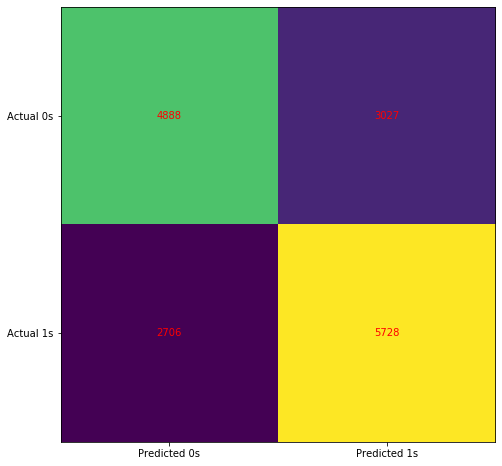

In [9]:
# Function that plots a confusion matrix given independent and target variable
def confusionMatrix(y_true, y_predicted):
    cm = confusion_matrix(y_true, y_predicted)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()

confusionMatrix(uni['to_uni_bool'], uni['prediction_to_uni'])

In [10]:
# Calculate classification report
print(classification_report(uni['to_uni_bool'], uni['prediction_to_uni']))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63      7915
           1       0.65      0.68      0.67      8434

    accuracy                           0.65     16349
   macro avg       0.65      0.65      0.65     16349
weighted avg       0.65      0.65      0.65     16349



- accuracy score of .65 which is close to the accuracy scores of the training data --> that means model generalizes well
- we exspected the model to perform slightly better on the test set as we obtain more training data (prior validation and test data) --> July might be slightly different to the other months in terms of trip direction towards the uni

## To Main Station

In [11]:
main_station = pd.read_csv(os.path.join(get_data_path(), 'predicted/direction_prediction_main_station.csv'), parse_dates=['start_time', 'end_time'])
main_station.sample(5).T

15003                6910   \
bike                                      20964                20715   
identification                         19520148             19328580   
start_time                  2019-07-24 17:03:00  2019-07-20 17:29:00   
end_time                    2019-07-24 17:15:00  2019-07-20 17:38:00   
weekend                                       0                    1   
duration_sec                                720                  540   
start_lng                               8.78559              8.86042   
start_lat                               53.0713              53.0792   
end_lng                                 8.80707              8.83652   
end_lat                                 53.0666              53.0793   
start_place                                   0                    0   
end_place                                     0                    0   
start_plz                                 28199                28211   
end_plz                                   28201                28211   
to_main_station_bool                          1                    1   
humidity_2m                                26.7                   89   
dew_point_2m                               12.6                   17   
max_m/s                                     5.1                  3.1   
hour                                         17                   17   
prediction_to_main_station                    1                    1   

                                          15292                5485   \
bike                                      20972                20669   
identification                         17322858             18385961   
start_time                  2019-07-19 13:05:00  2019-07-01 08:05:00   
end_time                    2019-07-19 13:32:00  2019-07-01 09:06:00   
weekend                                       0                    0   
duration_sec                               1620                 3660   
start_lng                               8.75304              8.80565   
start_lat                               53.1031              53.0826   
end_lng                                 8.75304              8.79448   
end_lat                                 53.1031              53.0681   
start_place                                2923                    0   
end_place                                  2923                    0   
start_plz                                 28217                28195   
end_plz                                   28217                28199   
to_main_station_bool                          1                    0   
humidity_2m                                  37                   54   
dew_point_2m                                8.9                 12.3   
max_m/s                                     8.2                  9.3   
hour                                         13                    8   
prediction_to_main_station                    1                    0   

                                          11131  
bike                                      20843  
identification                          7873233  
start_time                  2019-07-01 09:26:00  
end_time                    2019-07-01 09:53:00  
weekend                                       0  
duration_sec                               1620  
start_lng                               8.83319  
start_lat                               53.0841  
end_lng                                 8.82073  
end_lat                                 53.0518  
start_place                                   0  
end_place                                  2942  
start_plz                                 28209  
end_plz                                   28201  
to_main_station_bool                          0  
humidity_2m                                47.9  
dew_point_2m                               11.6  
max_m/s                                    13.9  
hour                                          9  
prediction_to_ma

In [12]:
# Calculate the exact accuracy score
accuracy_score(main_station['to_main_station_bool'], main_station['prediction_to_main_station'])

0.6897669582237446

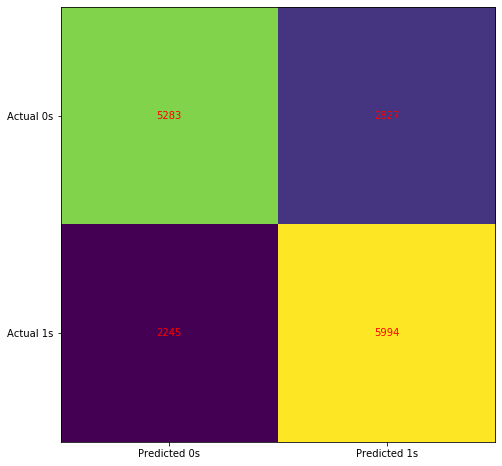

In [13]:
confusionMatrix(main_station['to_main_station_bool'], main_station['prediction_to_main_station'])

In [14]:
# Calculate classification report
print(classification_report(main_station['to_main_station_bool'], main_station['prediction_to_main_station']))

              precision    recall  f1-score   support

           0       0.70      0.65      0.68      8110
           1       0.68      0.73      0.70      8239

    accuracy                           0.69     16349
   macro avg       0.69      0.69      0.69     16349
weighted avg       0.69      0.69      0.69     16349



- accuracy score of .69 which is slightly better than the accuracy scores we got before --> this might be due to the fact that we have more training data now (prior validation and test data)
- as before the model generalizes very well (accuracy score of training, validation and test set differ less than .01)

# Demand

## 1h

In [15]:
demand_1H = pd.read_csv(os.path.join(get_data_path(), 'predicted/demand_prediction_1H.csv'))
demand_1H.sample(5).T

628        668        600        279        523
number_bookings  26.000000  10.000000  26.000000  14.000000   2.000000
month             7.000000   7.000000   7.000000   7.000000   7.000000
hour             11.000000   4.000000   7.000000  21.000000   1.000000
temp_2m          28.496154  19.320000  24.450000  15.614286  16.200000
min               0.000000   0.000000   0.000000   0.000000   0.000000
prediction_1H    38.597002  13.011929  21.722196  17.028151   7.234792

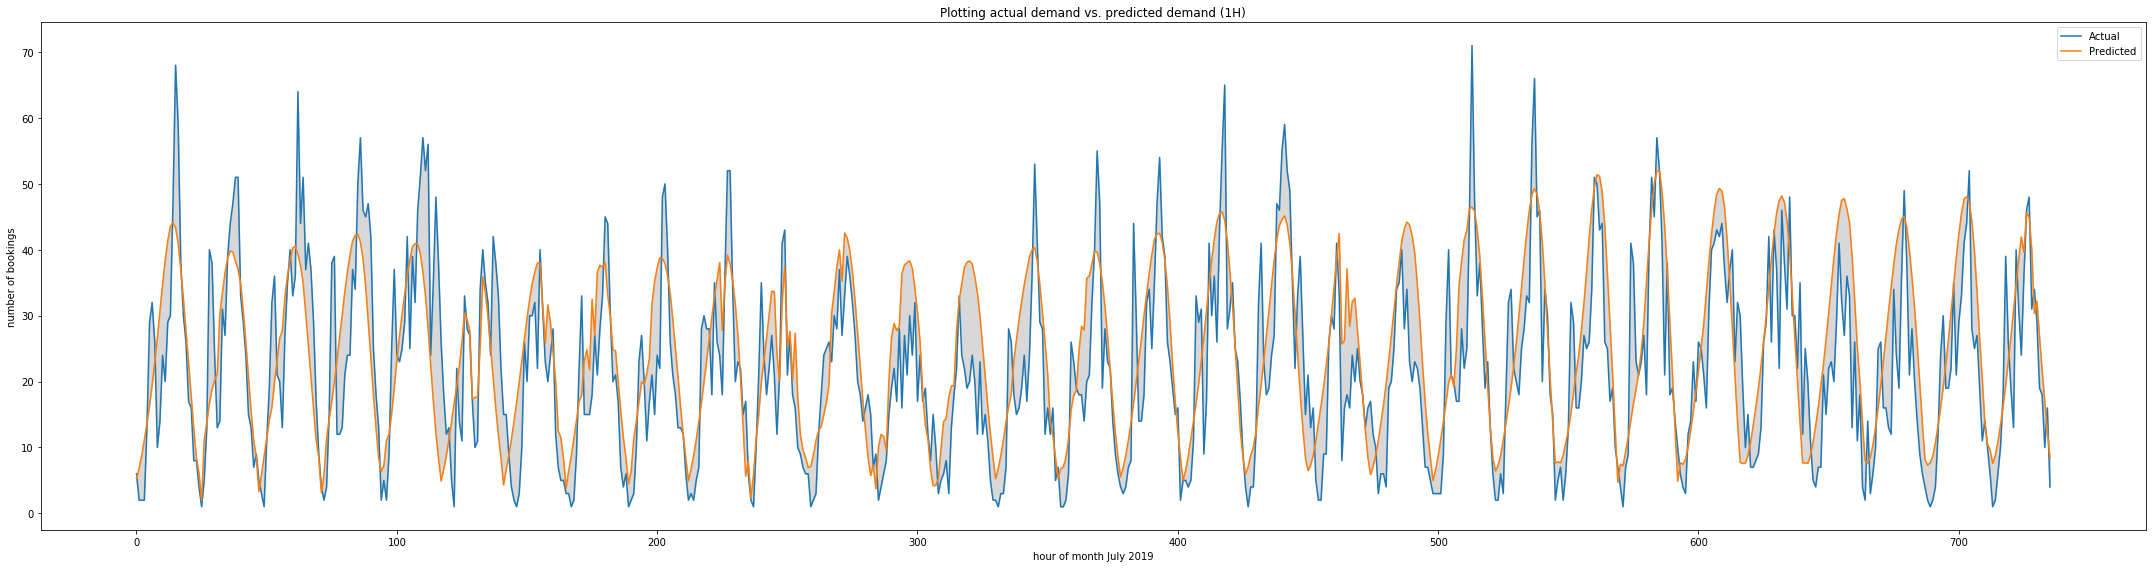

In [16]:
plt.figure(figsize=(30, 8))
plt.plot(demand_1H.index, demand_1H['number_bookings'])
plt.plot(demand_1H.index, demand_1H['prediction_1H'])
plt.fill_between(demand_1H.index, demand_1H['number_bookings'], demand_1H['prediction_1H'], color='grey', alpha='0.3')
plt.legend(['Actual','Predicted'])
plt.title('Plotting actual demand vs. predicted demand (1H)')
plt.xlabel('hour of month July 2019')
plt.ylabel('number of bookings')
plt.tight_layout()
plt.savefig('../reports/figures/test_performance_1H.pdf')
plt.show()

In [17]:
print(r2_score(demand_1H['number_bookings'],demand_1H['prediction_1H']))
print(mean_absolute_error(demand_1H['number_bookings'],demand_1H['prediction_1H']))

0.5125932495620568
7.823704283608364


Prior results: RMSE of 9.6278 and R2 of 0.6015 and MAE of 7.3038

## 6h

In [18]:
demand_6H = pd.read_csv(os.path.join(get_data_path(), 'predicted/demand_prediction_6H.csv'))
demand_6H.sample(5).T

122         41         60          31          87 
number_bookings  219.000000  147.000000  43.000000   75.000000  127.000000
month              7.000000    7.000000   7.000000    7.000000    7.000000
hour              14.584475    8.306122   3.790698   19.626667   19.708661
temp_2m           23.340639   16.866667  13.493023   13.609333   22.457480
min                0.716895    0.102041   1.627907    0.320000    0.000000
prediction_6H    236.745704  155.076324  60.624999  121.891423  148.329467

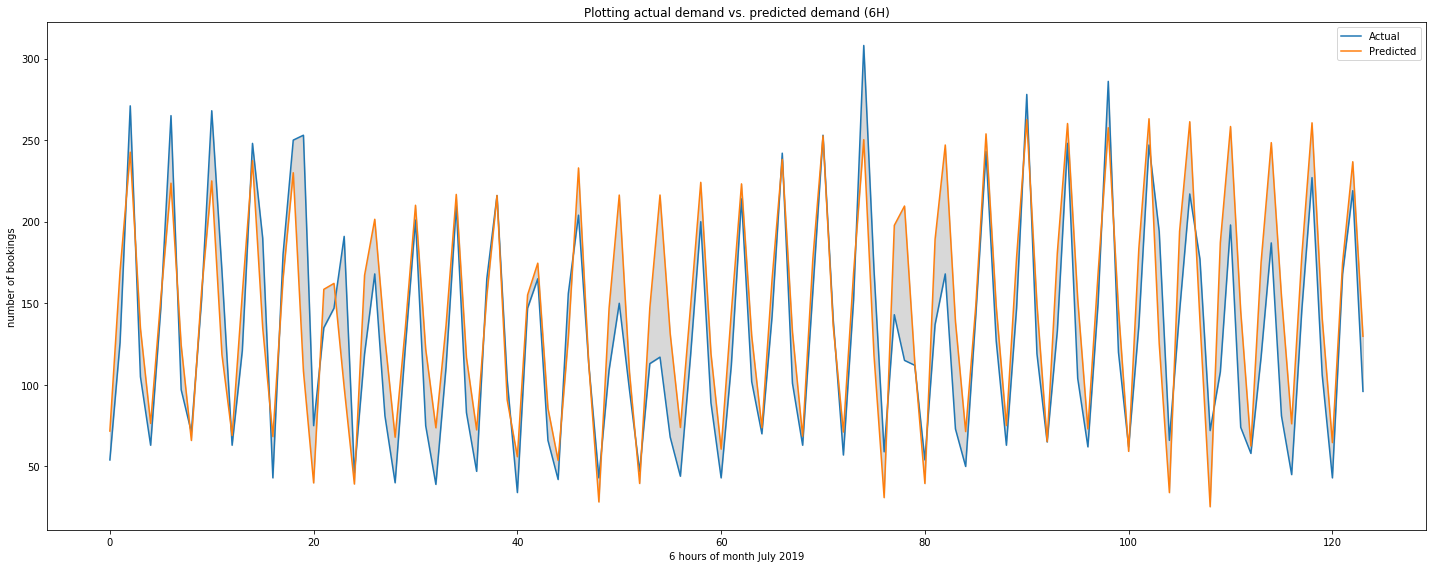

In [19]:
plt.figure(figsize=(20, 8))
plt.plot(demand_6H.index, demand_6H['number_bookings'])
plt.plot(demand_6H.index, demand_6H['prediction_6H'])
plt.fill_between(demand_6H.index, demand_6H['number_bookings'], demand_6H['prediction_6H'], color='grey', alpha='0.3')
plt.legend(['Actual','Predicted'])
plt.title('Plotting actual demand vs. predicted demand (6H)')
plt.xlabel('6 hours of month July 2019')
plt.ylabel('number of bookings')
plt.tight_layout()
plt.savefig('../reports/figures/test_performance_6H.pdf')
plt.show()

In [20]:
print(r2_score(demand_6H['number_bookings'],demand_6H['prediction_6H']))
print(mean_absolute_error(demand_6H['number_bookings'],demand_6H['prediction_6H']))

0.6717649157176397
30.3519132714308


Prior results: RMSE of 9.6278 and R2 of 0.6015 and MAE of 7.3038

## 12h

In [21]:
demand_12H = pd.read_csv(os.path.join(get_data_path(), 'predicted/demand_prediction_12H.csv'))
demand_12H.sample(5).T

51          57          18          5           48
number_bookings  441.000000  268.000000  212.000000  438.000000  212.000000
month              7.000000    7.000000    7.000000    7.000000    7.000000
hour              17.083900   16.104478    7.490566   16.710046    7.056604
temp_2m           28.531519   23.052612   15.242925   16.609132   28.598113
min                0.000000    0.000000    0.000000    0.000000    0.000000
prediction_12H   433.746367  379.378752  214.619332  354.489854  248.120589

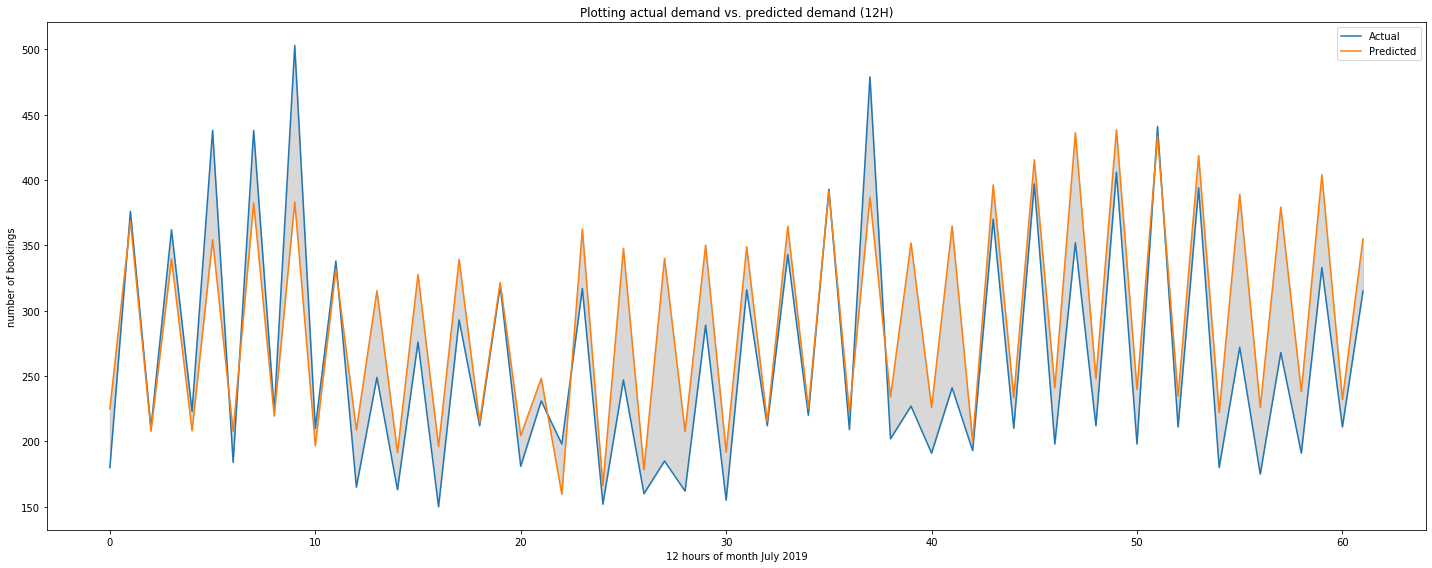

In [22]:
plt.figure(figsize=(20, 8))
plt.plot(demand_12H.index, demand_12H['number_bookings'])
plt.plot(demand_12H.index, demand_12H['prediction_12H'])
plt.fill_between(demand_12H.index, demand_12H['number_bookings'], demand_12H['prediction_12H'], color='grey', alpha='0.3')
plt.legend(['Actual','Predicted'])
plt.title('Plotting actual demand vs. predicted demand (12H)')
plt.xlabel('12 hours of month July 2019')
plt.ylabel('number of bookings')
plt.tight_layout()
plt.savefig('../reports/figures/test_performance_12H.pdf')
plt.show()

In [23]:
print(r2_score(demand_12H['number_bookings'],demand_12H['prediction_12H']))
print(mean_absolute_error(demand_12H['number_bookings'],demand_12H['prediction_12H']))

0.6421089920152083
41.88873217152443


## 24h

In [24]:
demand_24H = pd.read_csv(os.path.join(get_data_path(), 'predicted/demand_prediction_24H.csv'))
demand_24H.sample(5).T

25          26          29          15          13
number_bookings  639.000000  605.000000  524.000000  471.000000  345.000000
month              7.000000    7.000000    7.000000    7.000000    7.000000
hour              13.967136   13.423140   13.091603   13.246285   12.011594
temp_2m           27.561972   25.662314   25.619084   16.761146   15.104348
min                0.000000    0.000000    0.045802    0.403397    0.860870
prediction_24H   717.244024  671.872679  659.254360  526.298121  450.188329

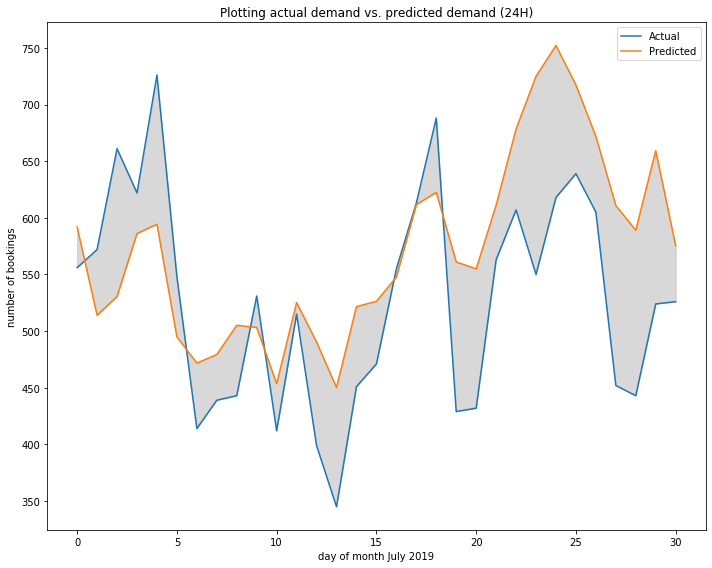

In [25]:
plt.figure(figsize=(10, 8))
plt.plot(demand_24H.index, demand_24H['number_bookings'])
plt.plot(demand_24H.index, demand_24H['prediction_24H'])
plt.fill_between(demand_24H.index, demand_24H['number_bookings'], demand_24H['prediction_24H'], color='grey', alpha='0.3')
plt.legend(['Actual','Predicted'])
plt.title('Plotting actual demand vs. predicted demand (24H)')
plt.xlabel('day of month July 2019')
plt.ylabel('number of bookings')
plt.tight_layout()
plt.savefig('../reports/figures/test_performance_24H.pdf')
plt.show()

In [26]:
print(r2_score(demand_24H['number_bookings'],demand_24H['prediction_24H']))
print(mean_absolute_error(demand_24H['number_bookings'],demand_24H['prediction_24H']))

0.06313569287057619
77.40866196443014


In [32]:
dataset = pd.read_csv(os.path.join(get_data_path(), 'processed/dataset.csv'), index_col=0)
dataset.head(3)

identification           start_time             end_time  weekend  \
bike                                                                       
20507        14776184  2019-04-21 17:34:00  2019-04-21 17:47:00        1   
20507        10278649  2019-04-23 17:55:00  2019-04-23 20:13:00        0   
20507        10278649  2019-04-24 10:38:00  2019-04-24 20:19:00        0   

       duration_sec  start_lng  start_lat   end_lng    end_lat  start_place  \
bike                                                                          
20507         780.0   8.884911  53.078923  8.899906  53.078711       2985.0   
20507        8280.0   8.884911  53.078923  8.884911  53.078923       2985.0   
20507       34860.0   8.884911  53.078923  8.884911  53.078923       2985.0   

       ...  humidity_2m  dew_point_2m  max_at_2m  mean_speed_h/s  \
bike   ...                                                         
20507  ...         24.8          -0.1       21.1             1.8   
20507  ...         43.2           5.9       18.7             6.7   
20507  ...         58.7          11.4       19.7             5.7   

       direction_degree_x  max_m/s  min_mean_m/s  max_mean_m/s  \
bike                                                             
20507               120.0      2.1           1.0           2.2   
20507               110.0     11.7           3.6           7.3   
20507               100.0      8.2           3.3           5.7   

       direction_degree_y  min  
bike                            
20507               110.0  0.0  
20507               110.0  0.0  
20507               100.0  0.0  

[3 rows x 24 columns]

In [43]:
# this function attaches over every bar in the bar chart the associated number
def label_bars(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

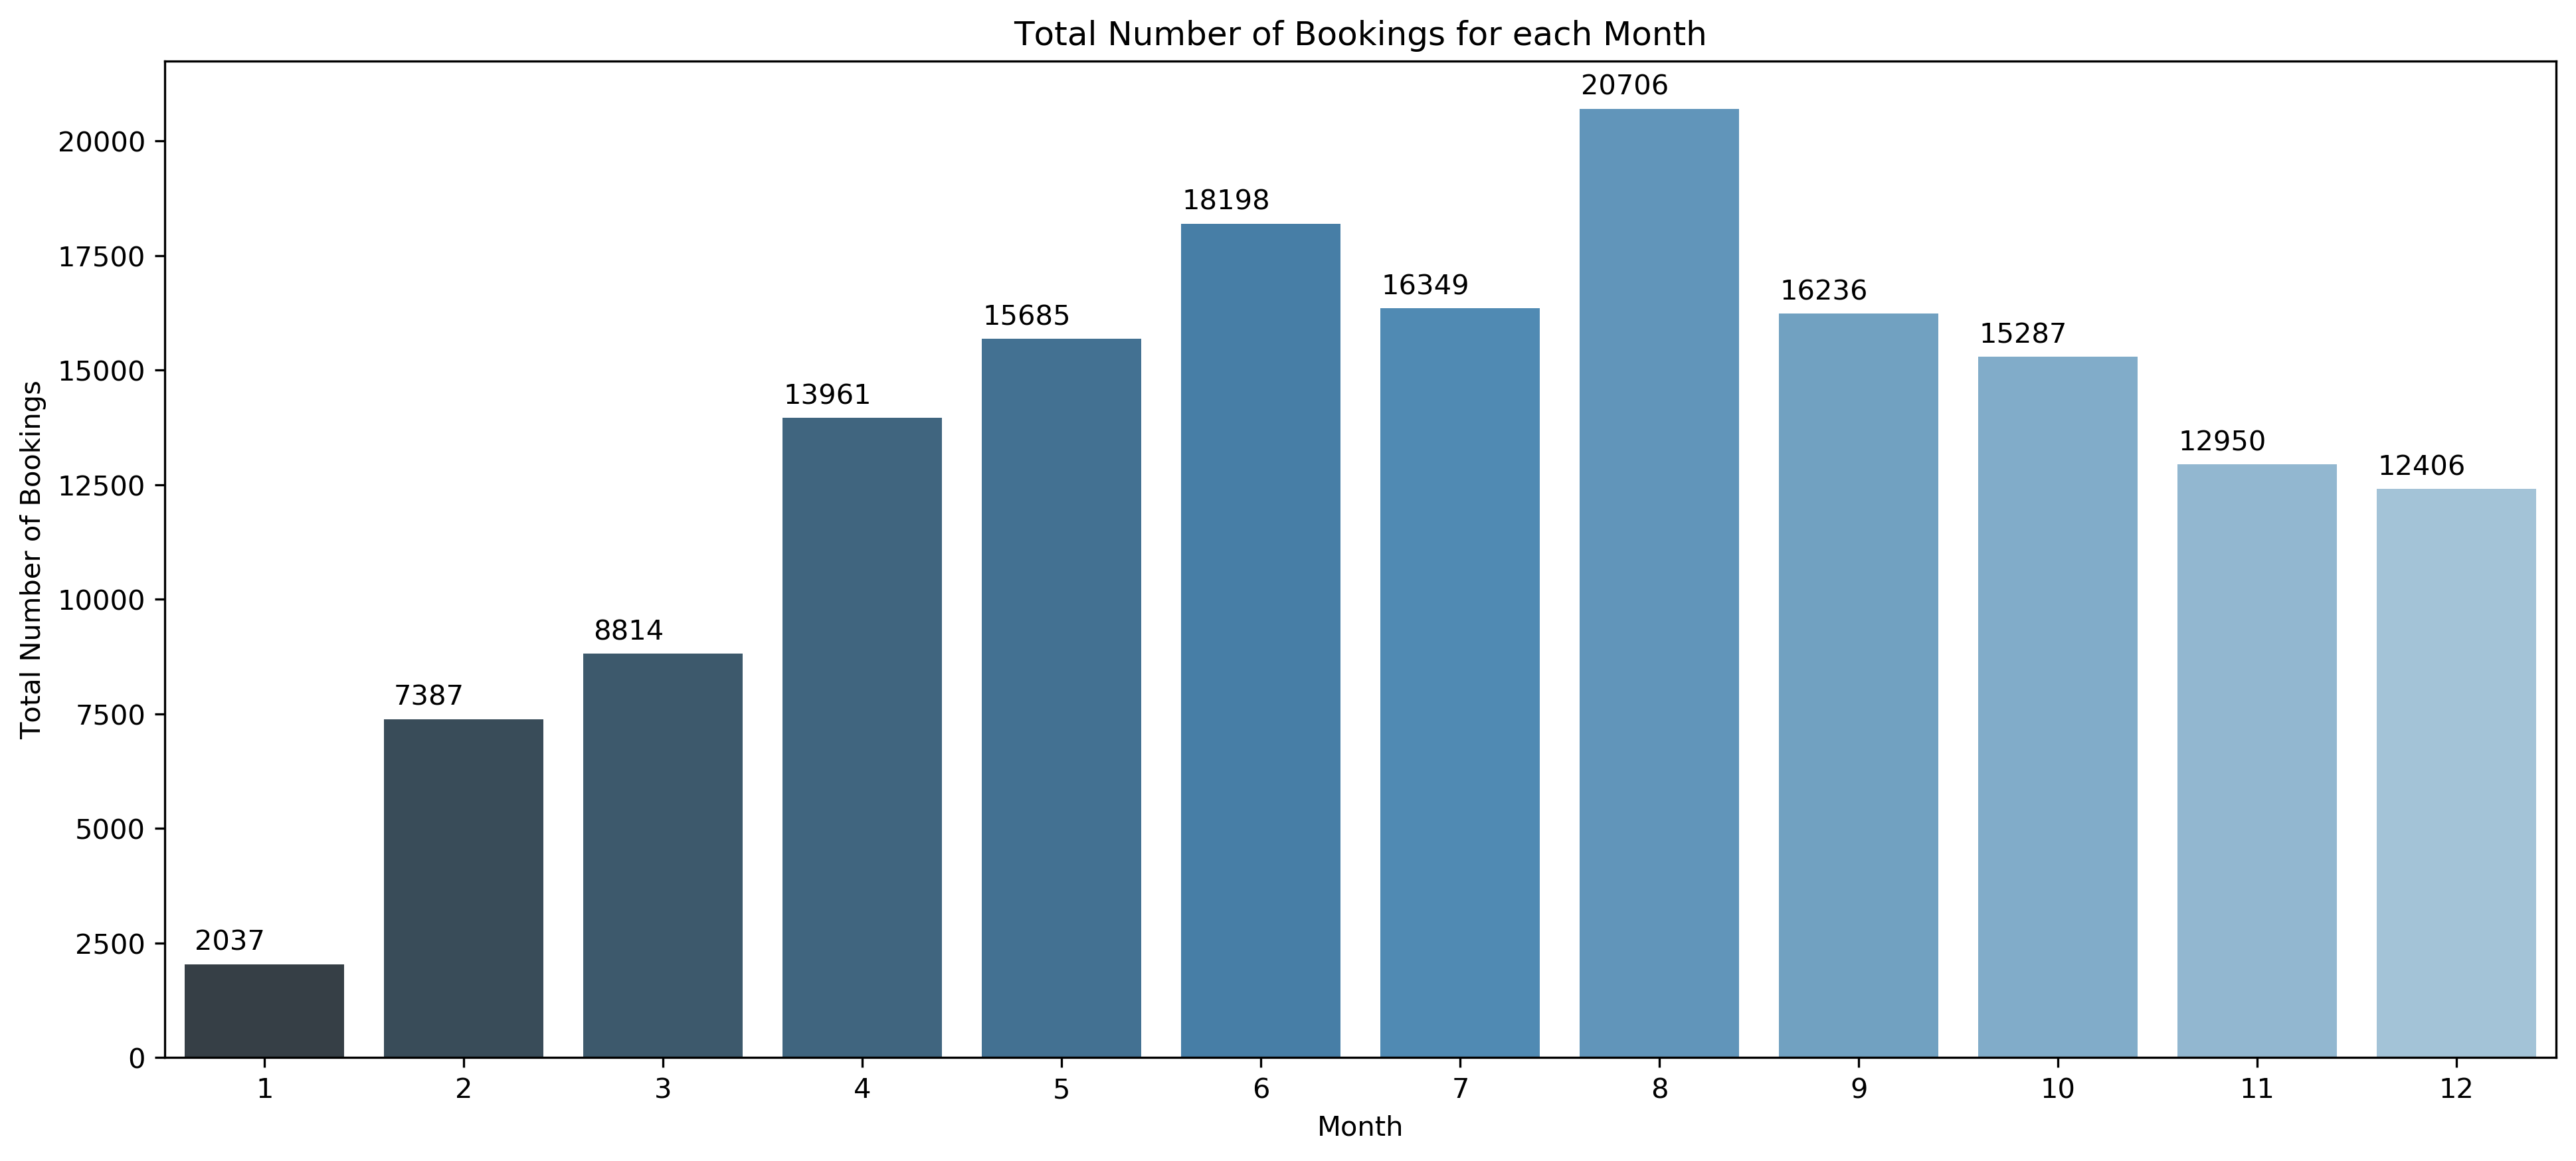

In [51]:
import numpy as np
import seaborn as sns

y = [2037, 7387,8814,13961,15685,18198,16349,20706,16236,15287,12950,12406]
x = np.arange(len(labels))
width = 0.35

Fig_1 = plt.figure(figsize=(12,5),dpi = 300)

ax = Fig_1.add_axes([0,0,1,1])

rects1 = ax.bar(x - width/2, y, width)

ax = sns.barplot(x=np.arange(1,13), y=y, palette="Blues_d")

ax.set(ylabel='Total Number of Bookings', xlabel='Month') 

label_bars(rects1)

ax.set_title('Total Number of Bookings for each Month')
plt.savefig("../reports/figures/monthly_distribution_bookings_with_july.pdf", bbox_inches='tight')

- July has less bookings than both months June and August this explains the bias (positive)
- our regression model fits the month of July between June and August especially as the month is a major feature